In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# About Dataset - [MAGIC Gamma Telescope](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

* Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope.

* The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

* Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

* [The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).](http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68)

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

*  Columns Information:
    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   11.  class:    g,h         # gamma (signal), hadron (background)

   g = gamma (signal):     12332
   h = hadron (background): 6688

*   The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.

In [ ]:
# Read the file

cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
magic_data = pd.read_csv('magic04.data',names =cols)

In [ ]:
magic_data.head()

In [ ]:
magic_data['class'].unique()

In [ ]:
magic_data['class'] = (magic_data['class'] == 'g').astype(int)

 ## Preparing the Data

In [ ]:
for label in cols[:-1]:
    plt.hist(magic_data[magic_data['class']==1][label],color ='blue',label ='gamma',alpha=0.7,density =True)
    plt.hist(magic_data[magic_data['class']==0][label],color ='red',label ='gamma',alpha=0.7,density =True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train ,validation ,test datasets

In [ ]:
train,valid,test = np.split(magic_data.sample(frac=1),[int(0.6*len(magic_data)),int(0.8*len(magic_data))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
    x= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X=scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X, y)
        
    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data, X,y

In [ ]:
train, X_train, y_train =scale_dataset(train, oversample=True)
valid, X_valid, y_valid =scale_dataset(valid, oversample=False)
test, X_test, y_test =scale_dataset(test, oversample=False)

## KNN (K- Nearest Neighbors Algorithms)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

In [ ]:
y_pred =knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

 ## Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

##  SVM algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model =SVC()
svc_model = svc_model.fit(X_train, y_train)

In [ ]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Neural Network

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig,(ax1,ax2) =plt.subplots(1,2, figsize=(10,4))
    
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob,lr,batch_size,epochs):
    nn_model =tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation ='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation ='sigmoid')
    ])
    nn_model.compile(optimizer =tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                metrics=['accuracy'])
    history=nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch_size 32


C:\Users\negip\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


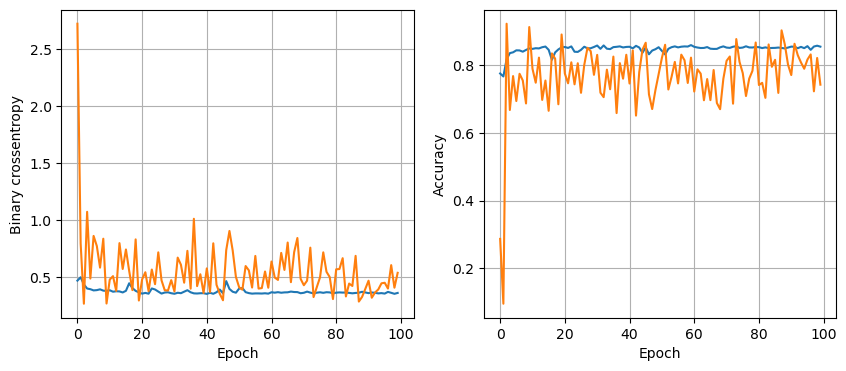

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3620
16 nodes, dropout 0, lr 0.1, batch_size 64


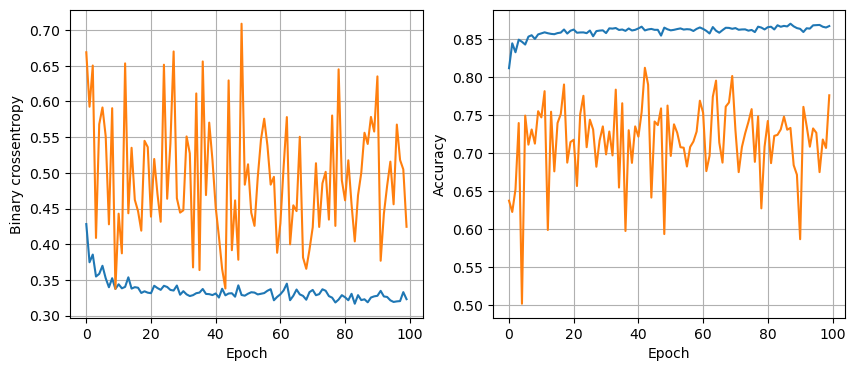

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3772
16 nodes, dropout 0, lr 0.1, batch_size 128


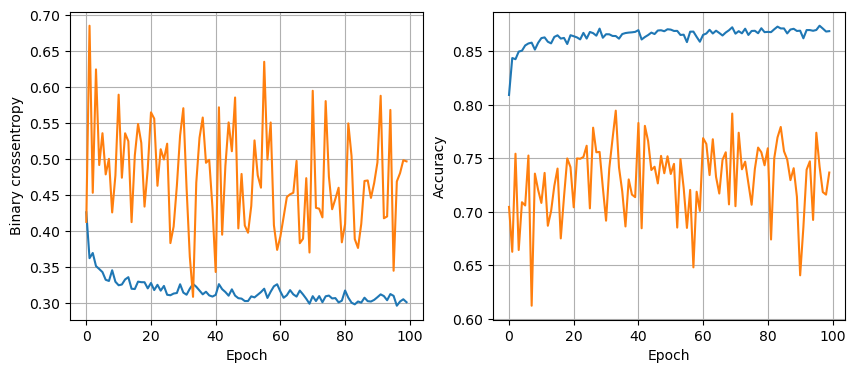

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3649
16 nodes, dropout 0, lr 0.005, batch_size 32


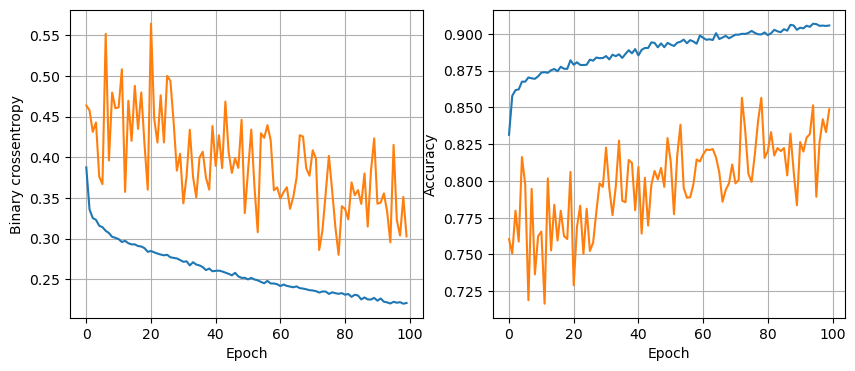

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.3713
16 nodes, dropout 0, lr 0.005, batch_size 64


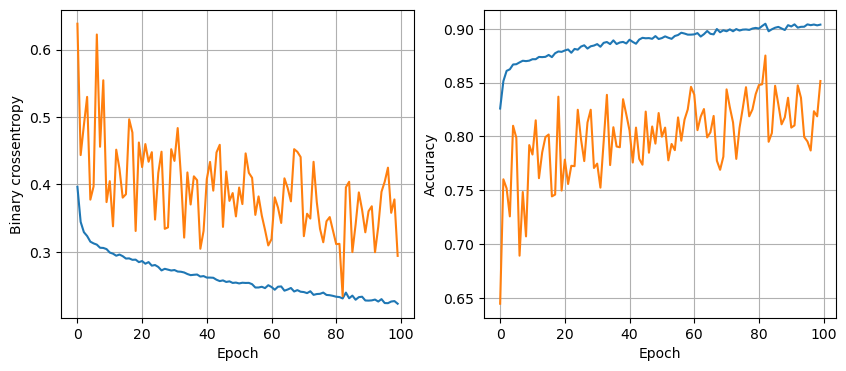

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3839
16 nodes, dropout 0, lr 0.005, batch_size 128


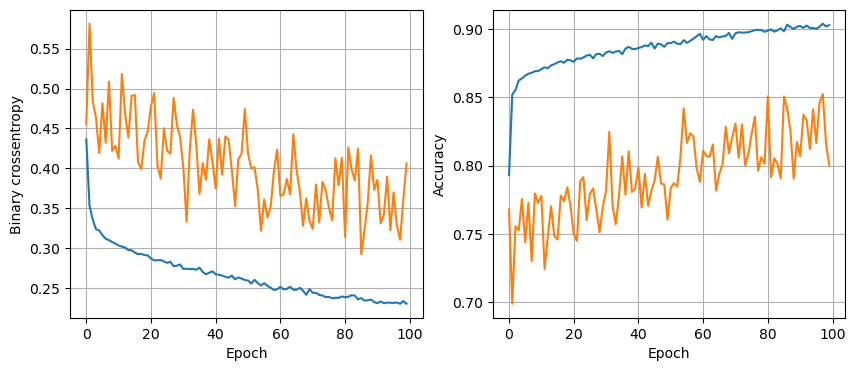

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3748
16 nodes, dropout 0, lr 0.001, batch_size 32


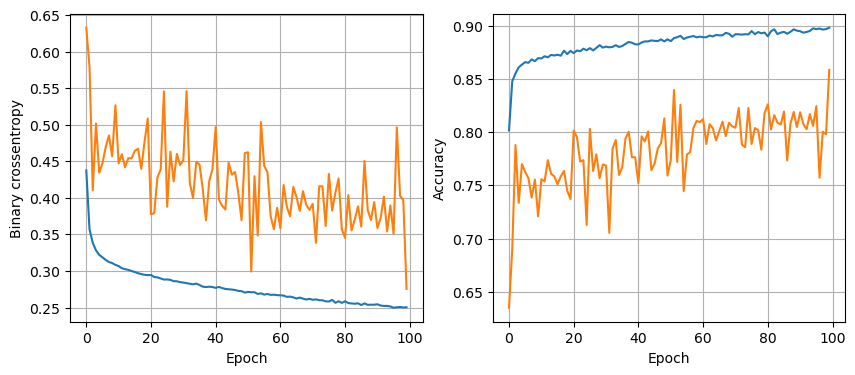

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.3512
16 nodes, dropout 0, lr 0.001, batch_size 64


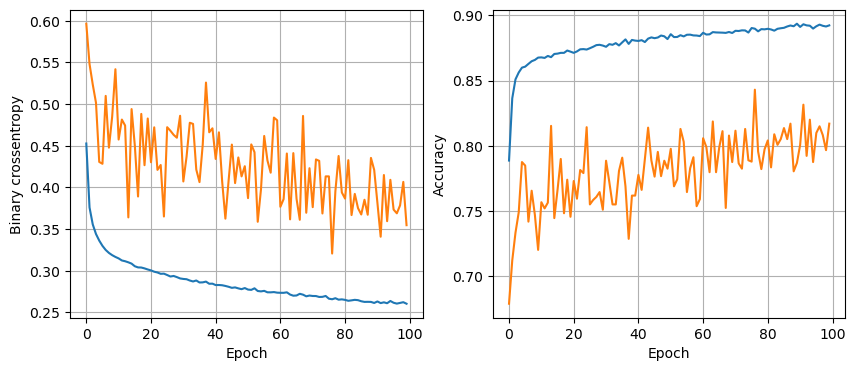

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3282
16 nodes, dropout 0, lr 0.001, batch_size 128


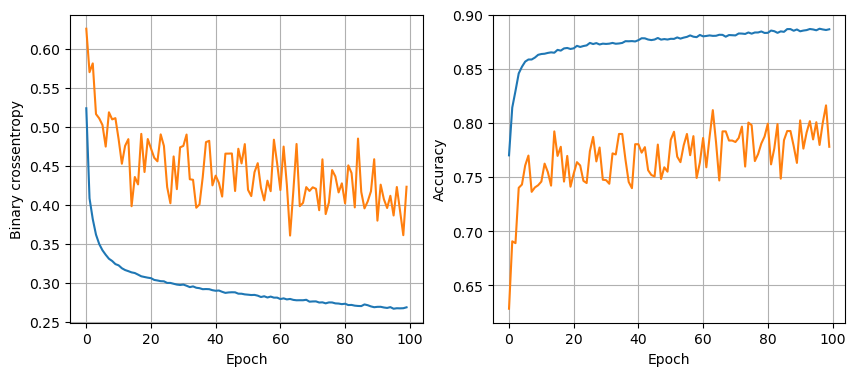

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.3280
16 nodes, dropout 0.2, lr 0.1, batch_size 32


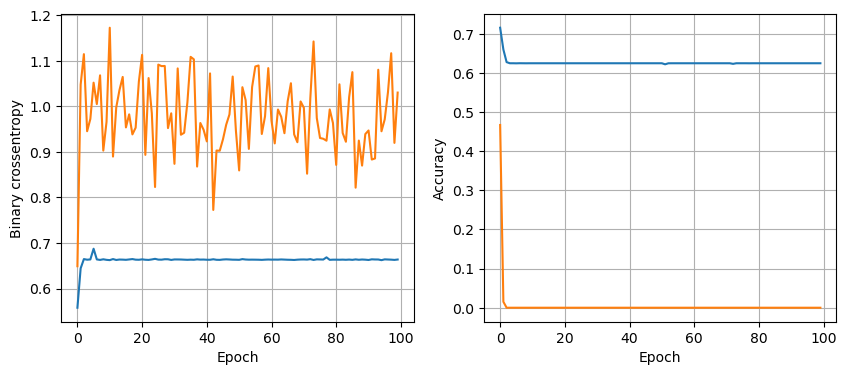

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6453
16 nodes, dropout 0.2, lr 0.1, batch_size 64


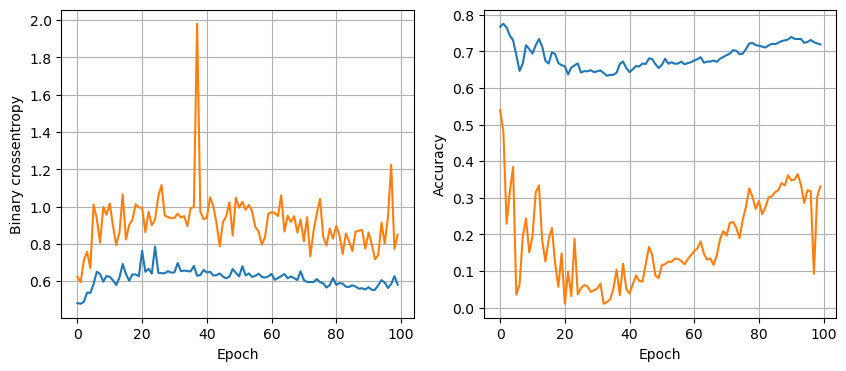

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.5297
16 nodes, dropout 0.2, lr 0.1, batch_size 128


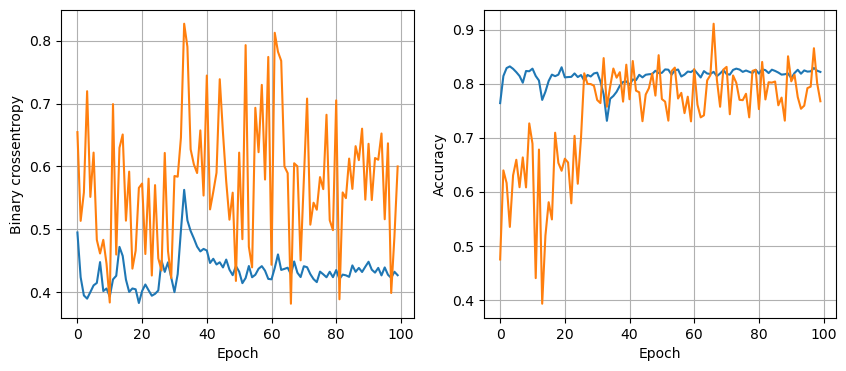

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4011
16 nodes, dropout 0.2, lr 0.005, batch_size 32


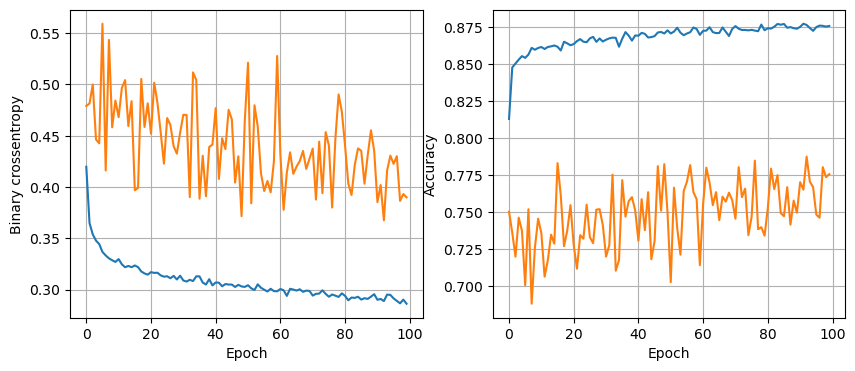

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3228
16 nodes, dropout 0.2, lr 0.005, batch_size 64


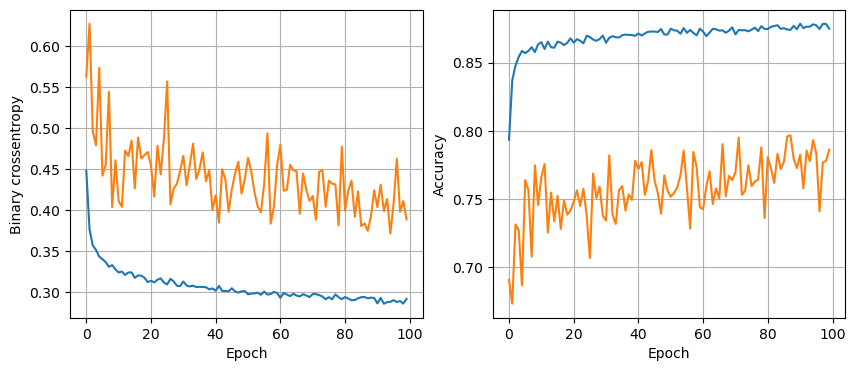

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3221
16 nodes, dropout 0.2, lr 0.005, batch_size 128


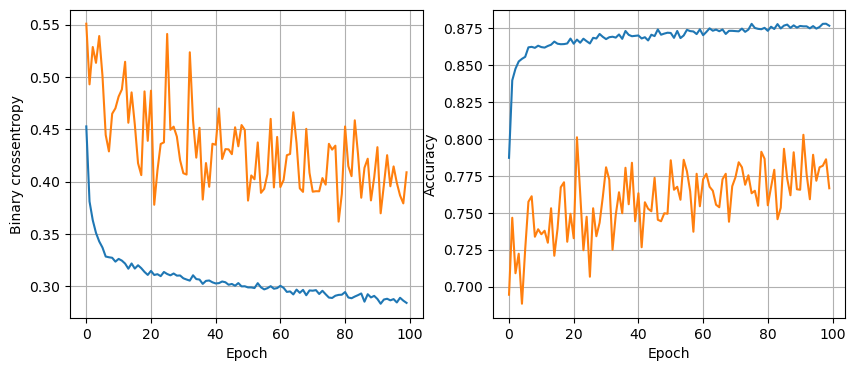

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3207
16 nodes, dropout 0.2, lr 0.001, batch_size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model= None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
y_pred =least_loss_model.predict(X_test)
y_pred = (y_pred >0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test,y_pred))